In [21]:
import numpy as np
from numpy.testing import assert_array_almost_equal, assert_array_equal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [22]:
df = pd.read_csv("credit_card_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Type_Occupation  1060 non-null   object 
 13  Family_Members   1548 non-null   int64  
 14  Rejected         1548 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 181.5+ KB


In [23]:
# Check for missing values
df.isnull().sum()

,0
Ind_ID,0
GENDER,7
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,23
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0


In [24]:
# Checking missing values
missing_percent = df.isnull().mean() * 100
df_missing_percentage = (df.isnull().sum() /len(df)) * 100
print(missing_percent)

#Here, pandas library is used because numpy command 'isnan' not supported for the input types for now

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Type_Occupation    31.524548
Family_Members      0.000000
Rejected            0.000000
dtype: float64


In [25]:
# Filling in missing values
df['GENDER']= df['GENDER'].fillna(df['GENDER'].mode().iloc[0]) # Filling missing values ​​in the gender column with mode

df['Annual_income']= df['Annual_income'].fillna(df['Annual_income'].median()) # Filling in missing values ​​in the annual income column with the median

df['Birthday_count']= df['Birthday_count'].fillna(df['Birthday_count'].median()) # Filling in missing values ​​in the birthday count column with the median

df['Type_Occupation']= df['Type_Occupation'].fillna('Unknown') # Filling in missing values ​​as "Unknown"


# Check again
missing_ratio = df.isnull().mean() * 100
print(missing_ratio)

Ind_ID             0.0
GENDER             0.0
Car_Owner          0.0
Propert_Owner      0.0
CHILDREN           0.0
Annual_income      0.0
Type_Income        0.0
EDUCATION          0.0
Marital_status     0.0
Housing_type       0.0
Birthday_count     0.0
Employed_days      0.0
Type_Occupation    0.0
Family_Members     0.0
Rejected           0.0
dtype: float64


In [26]:
# Checking for duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of duplicates: {duplicates_count}")

Number of duplicates: 0


In [27]:
# Summarizing the dataset
print(df.describe())

             Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.548000e+03     1548.000000   
mean   5.078920e+06     0.412791   1.910294e+05   -16034.958010   
std    4.171759e+04     0.776691   1.124483e+05     4199.561035   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19476.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12483.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Family_Members     Rejected  
count    1548.000000     1548.000000  1548.000000  
mean    59364.689922        2.161499     0.113049  
std    137808.062701        0.947772     0.316755  
min    -14887.000000        1.000000     0.000000  
25%     -3174.500000        2.000000     0.000000  
50%     -1565.000000        2.000000     0.000000  
75%      -431.750000        3.00

## Step 3: Distribution Analysis

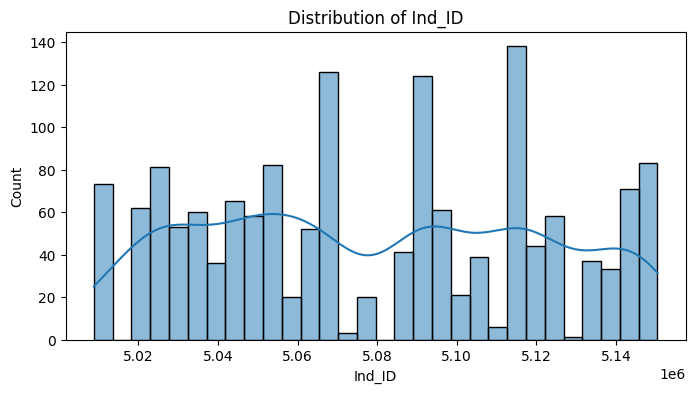

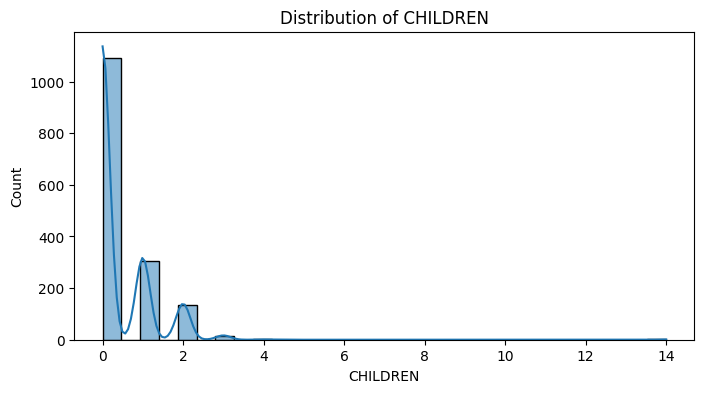

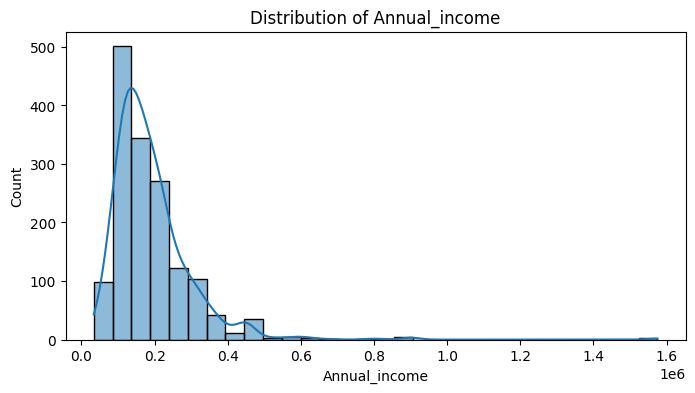

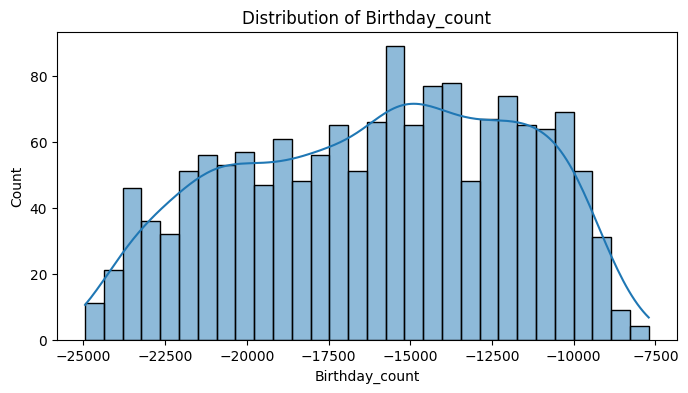

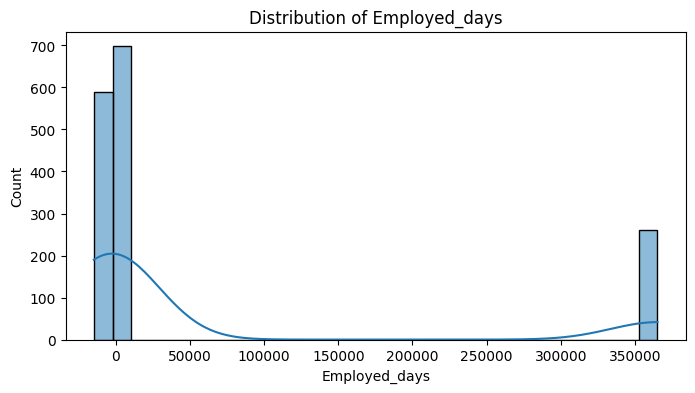

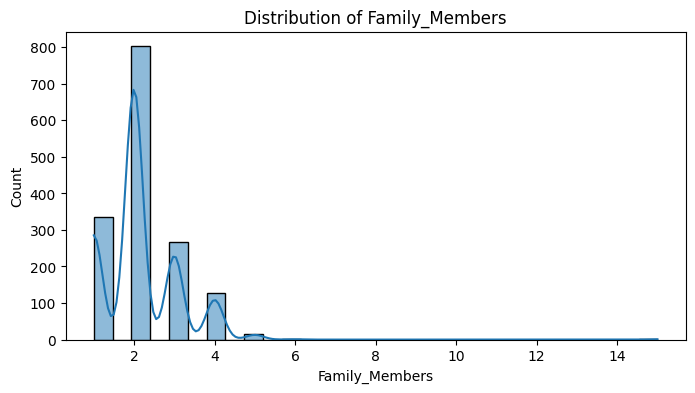

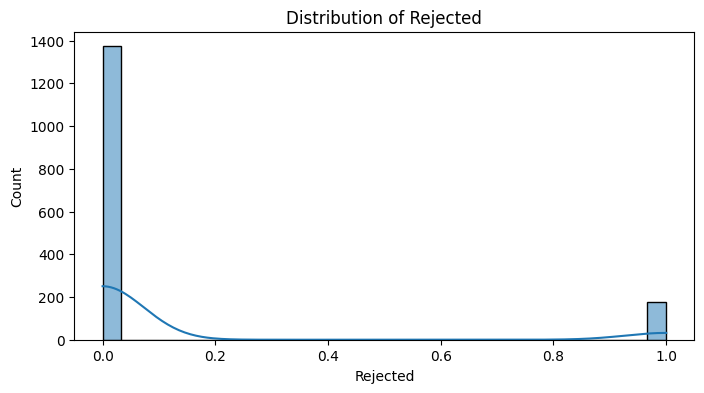

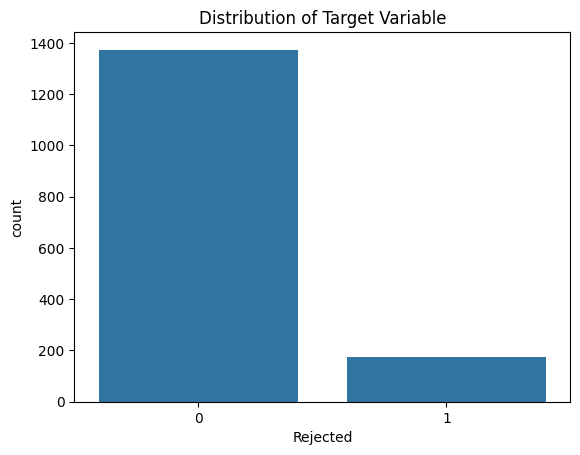

In [28]:
# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()

# Visualize the target variable distribution
sns.countplot(x='Rejected', data=df)
plt.title("Distribution of Target Variable")
plt.show()


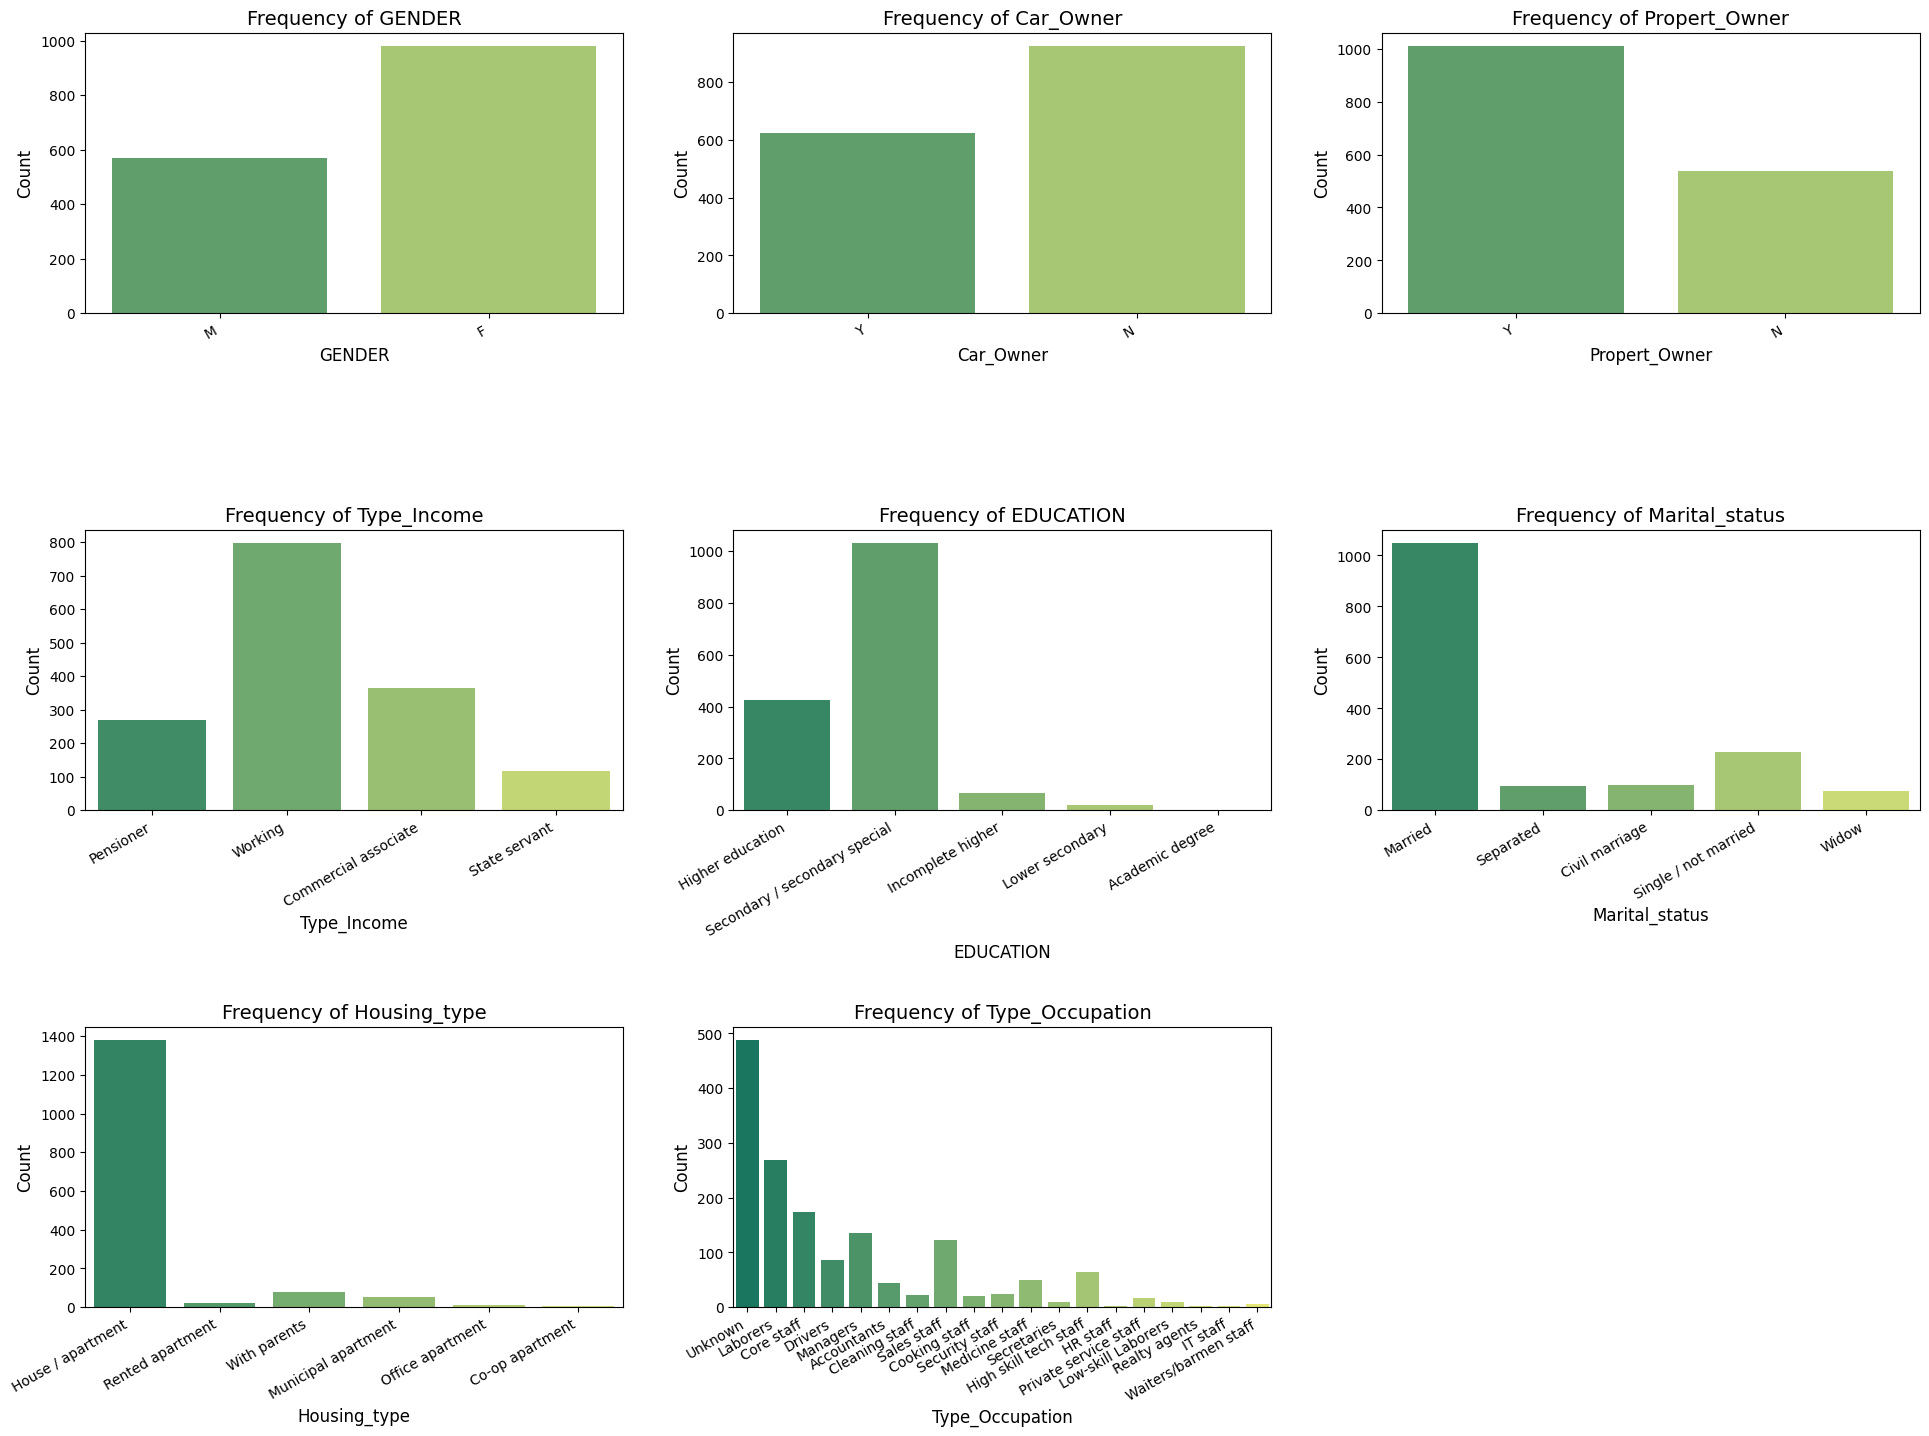

In [29]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(20, 15))
# Plot a separate barplot for each column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df, palette='summer', hue=column, dodge=False, legend=False)  # Countplot
    plt.title(f'Frequency of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=30, ha='right')  # Rotate categories on the x-axis
plt.tight_layout(pad=3.0)
plt.show()

                  Ind_ID  CHILDREN  Annual_income  Birthday_count  \
Ind_ID          1.000000  0.032535       0.031019        0.022750   
CHILDREN        0.032535  1.000000       0.078543        0.277944   
Annual_income   0.031019  0.078543       1.000000        0.110682   
Birthday_count  0.022750  0.277944       0.110682        1.000000   
Employed_days  -0.055396 -0.219095      -0.158966       -0.614271   
Family_Members  0.016950  0.890248       0.051522        0.265066   
Rejected        0.016796 -0.021646       0.024425       -0.044918   

                Employed_days  Family_Members  Rejected  
Ind_ID              -0.055396        0.016950  0.016796  
CHILDREN            -0.219095        0.890248 -0.021646  
Annual_income       -0.158966        0.051522  0.024425  
Birthday_count      -0.614271        0.265066 -0.044918  
Employed_days        1.000000       -0.238705  0.031408  
Family_Members      -0.238705        1.000000 -0.030709  
Rejected             0.031408       -0.03

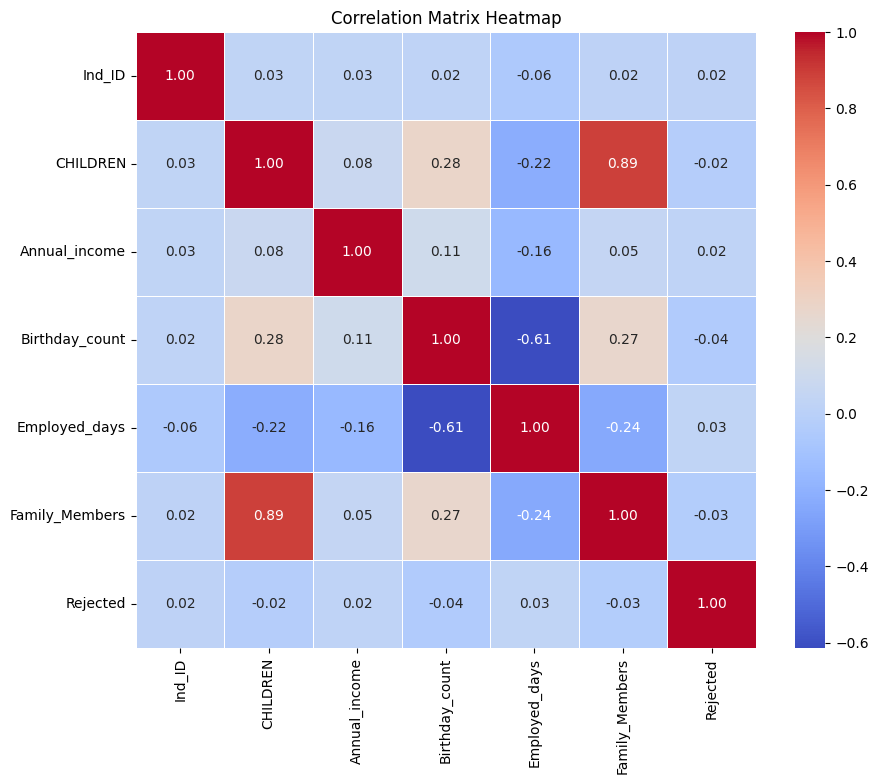

In [30]:
corr_numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Creating correlation matrix
correlation_matrix = corr_numeric_columns.corr()
print(correlation_matrix)

# Plotting heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # Matrix design
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,Rejected
count,1.548000e+03,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.910294e+05,-16034.958010,59364.689922,2.161499,0.113049
std,4.171759e+04,0.776691,1.124483e+05,4199.561035,137808.062701,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19476.000000,-3174.500000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12483.000000,-431.750000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000,1.000000


In [32]:
print(df.iloc[[451]])

      Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
451  5048542      F         N             Y         0       121900.5   

    Type_Income                      EDUCATION Marital_status  \
451   Pensioner  Secondary / secondary special        Married   

          Housing_type  Birthday_count  Employed_days Type_Occupation  \
451  House / apartment        -15946.0         365243         Unknown   

     Family_Members  Rejected  
451               2         0  


# ENCODING FEATURES

**Ind_ID:** Ind_ID are unique identification numbers for Client_id's, so it is normal for them to be evenly distributed.

**Children:** Most people are childless or have one child. However, a few people have high numbers of children, which are considered outliers.

**Annual_income:** The income distribution is right-skewed. Most people are low-income.

**Family_members:** For most people, the number of family members is concentrated between 2-4, but high values ​​are observed for a few people. High values ​​are considered extreme values.

**Rejected:** The target is variable. For most people the value of Rejected is 0 (not rejected), but for a small number the value is close to 1 (rejected).

**Birth_year:** The data is concentrated between 1960-2000.

**Age:** Ages are distributed in a wide range between 20 and 70. It is observed that the data is generally evenly distributed.

**Employment_duration_day:** Most of the data is close to 0 (currently unemployed), but there are also individuals who have worked for a long time.

In [33]:
credit_card_dataset_path = "credit_card_dataset.csv"

Ind_ID = np.genfromtxt(credit_card_dataset_path,
                    delimiter=",",
                    skip_header=1,
                    usecols=[0]).astype(int)

GENDER = np.genfromtxt(credit_card_dataset_path, delimiter=",", skip_header=1, usecols=[1],\
                    converters = {1:lambda x: 0 if x == b'M' else 1}).astype(int)

Car_Owner = np.genfromtxt(credit_card_dataset_path, delimiter=",", skip_header=1, usecols=[2],\
                    converters = {2:lambda x: 0 if x == b'N' else 1}).astype(int)

Propert_Owner = np.genfromtxt(credit_card_dataset_path, delimiter=",", skip_header=1, usecols=[3],\
                    converters = {3:lambda x: 0 if x == b'N' else 1}).astype(int)

CHILDREN = np.genfromtxt(credit_card_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[4]).astype(int)

#annual_income = df["Annual_income"].astype(float).to_numpy()
Annual_income = np.genfromtxt(credit_card_dataset_path,
                              delimiter=",",
                              skip_header=1,
                              usecols=[5]).astype(float)

In [34]:
Type_Income = np.genfromtxt(credit_card_dataset_path, delimiter=",", \
                                 skip_header=1, usecols=[6], dtype = None, encoding=None)
incometype_P = np.where(Type_Income == 'Pensioner', 1, 0).astype(int)
incometype_CA = np.where(Type_Income == 'Commercial associate', 1, 0).astype(int)
incometype_W = np.where(Type_Income == 'Working', 1, 0).astype(int)
incometype_SS = np.where(Type_Income == 'State servant', 1, 0).astype(int)

In [35]:
EDUCATION = np.genfromtxt(credit_card_dataset_path, delimiter=",", \
                                 skip_header=1, usecols=[7], dtype = None, encoding=None)

education_AD = np.where(EDUCATION == 'Academic degree', 1, 0).astype(int)
education_HE = np.where(EDUCATION == 'Higher education', 1, 0).astype(int)
education_IH = np.where(EDUCATION == 'Incomplete higher', 1, 0).astype(int)
education_LS = np.where(EDUCATION == 'Lower secondary', 1, 0).astype(int)
education_SS =np.where(EDUCATION == 'Secondary / secondary special', 1, 0).astype(int)

In [36]:
Marital_status = np.genfromtxt(credit_card_dataset_path, delimiter=",", \
                                 skip_header=1, usecols=[8], dtype = None, encoding=None)

# Convert categories into binary features
marital_status_CW = np.where(Marital_status == 'Civil marriage', 1, 0).astype(int)
marital_status_M = np.where(Marital_status == 'Married', 1, 0).astype(int)
marital_status_SP = np.where(Marital_status == 'Separated', 1, 0).astype(int)
marital_status_SNG = np.where(Marital_status == 'Single / not married', 1, 0).astype(int)
marital_status_W = np.where(Marital_status == 'Widow', 1, 0).astype(int)

In [37]:
Housing_type = np.genfromtxt(credit_card_dataset_path, delimiter=",", \
                                 skip_header=1, usecols=[9], dtype = None, encoding=None)
# Convert categories into binary features
housing_type_CA = np.where(Housing_type == 'Co-op apartment', 1, 0).astype(int)
housing_type_HA = np.where(Housing_type == 'House / apartment', 1, 0).astype(int)
housing_type_MA = np.where(Housing_type == 'Municipal apartment', 1, 0).astype(int)
housing_type_OA = np.where(Housing_type == 'Office apartment', 1, 0).astype(int)
housing_type_RA = np.where(Housing_type == 'Rented apartment', 1, 0).astype(int)
housing_type_WP = np.where(Housing_type == 'With parents', 1, 0).astype(int)

In [38]:
Type_Occupation = np.genfromtxt(credit_card_dataset_path, delimiter=",", \
                                 skip_header=1, usecols=[12], dtype = None, encoding=None)

# Convert categories into binary features
type_occupation_AC = np.where(Type_Occupation == 'Accountants', 1, 0).astype(int)
type_occupation_CL = np.where(Type_Occupation == 'Cleaning staff', 1, 0).astype(int)
type_occupation_CO = np.where(Type_Occupation == 'Cooking staff', 1, 0).astype(int)
type_occupation_CR = np.where(Type_Occupation == 'Core staff', 1, 0).astype(int)
type_occupation_DR = np.where(Type_Occupation == 'Drivers', 1, 0).astype(int)
type_occupation_HR = np.where(Type_Occupation == 'HR staff', 1, 0).astype(int)
type_occupation_HS = np.where(Type_Occupation == 'High skill tech staff', 1, 0).astype(int)
type_occupation_IT = np.where(Type_Occupation == 'IT staff', 1, 0).astype(int)
type_occupation_LB = np.where(Type_Occupation == 'Laborers', 1, 0).astype(int)
type_occupation_LL = np.where(Type_Occupation == 'Low-skill Laborers', 1, 0).astype(int)
type_occupation_MG = np.where(Type_Occupation == 'Managers', 1, 0).astype(int)
type_occupation_MS = np.where(Type_Occupation == 'Medicine staff', 1, 0).astype(int)
type_occupation_PS = np.where(Type_Occupation == 'Private service staff', 1, 0).astype(int)
type_occupation_RA = np.where(Type_Occupation == 'Realty agents', 1, 0).astype(int)
type_occupation_SA = np.where(Type_Occupation == 'Sales staff', 1, 0).astype(int)
type_occupation_SE = np.where(Type_Occupation == 'Secretaries', 1, 0).astype(int)
type_occupation_SC = np.where(Type_Occupation == 'Security staff', 1, 0).astype(int)
type_occupation_WB = np.where(Type_Occupation == 'Waiters/barmen staff', 1, 0).astype(int)

In [39]:
Birthday_count = np.genfromtxt(credit_card_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[10]).astype(int)


Employed_days = np.genfromtxt(credit_card_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[11]).astype(int)


Family_Members = np.genfromtxt(credit_card_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[13]).astype(int)

Rejected = np.genfromtxt(credit_card_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[14]).astype(int)

<ipython-input-39-71252134282a>:4: RuntimeWarning: invalid value encountered in cast
  usecols=[10]).astype(int)


In [40]:
credit_card_input = np.c_[
    Ind_ID, GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income,
    incometype_P, incometype_CA, incometype_W, incometype_SS,
    education_AD, education_HE, education_IH, education_LS, education_SS,
    marital_status_CW, marital_status_M, marital_status_SP, marital_status_SNG, marital_status_W,
    housing_type_CA, housing_type_HA, housing_type_MA, housing_type_OA, housing_type_RA, housing_type_WP,
    Birthday_count, Employed_days,
    type_occupation_AC, type_occupation_CL, type_occupation_CO, type_occupation_CR, type_occupation_DR,
    type_occupation_HR, type_occupation_HS, type_occupation_IT, type_occupation_LB, type_occupation_LL,
    type_occupation_MG, type_occupation_MS, type_occupation_PS, type_occupation_RA, type_occupation_SA,
    type_occupation_SE, type_occupation_SC, type_occupation_WB,
    Family_Members
]

In [41]:
credit_card_input_df = pd.DataFrame(credit_card_input)
credit_card_input_df = credit_card_input_df.fillna(0)
credit_card_input = credit_card_input_df.values

In [42]:
if np.isnan(credit_card_input).any():
    print("credit_card_input contains NaN values.")
else:
    print("credit_card_input does not contain NaN values.")

credit_card_input does not contain NaN values.


In [43]:
nan_indices = np.where(np.isnan(credit_card_input))

# Print the indices where NaN values are located
print("Indices of NaN values:", nan_indices)

# Print the actual NaN values
print("NaN values:", credit_card_input[nan_indices])

Indices of NaN values: (array([], dtype=int64), array([], dtype=int64))
NaN values: []


In [44]:
labels = Rejected.reshape(-1, 1)

In [45]:
print("credit_card_input.shape:", credit_card_input.shape)
print("labels.shape:", labels.shape)
print("First row of credit_card_input:", credit_card_input[0])
print("First label:", labels[0])

credit_card_input.shape: (1548, 47)
labels.shape: (1548, 1)
First row of credit_card_input: [ 5.008827e+06  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00
  1.800000e+05  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00 -1.877200e+04  3.652430e+05  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  2.000000e+00]
First label: [1]


In [49]:
np.random.seed(42)
shuffled_indices = np.random.permutation(len(credit_card_input))

#SIZE OF TRAINIG AND TEST SETS(80% - 20%)
test_size = int(len(credit_card_input) * 0.2)
test_indices = shuffled_indices[:test_size]
train_indices = shuffled_indices[test_size:]

#SPLITTIN TRAIING AND TEST SETS
X_train = credit_card_input[train_indices]
y_train = labels[train_indices]
X_test = credit_card_input[test_indices]
y_test = labels[test_indices]

print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

Training_set size: (1239, 47), Test set size: (309, 47)


In [50]:
def standardise(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    # This line was added to prevent division error; if a column has a standard deviation of 0, use 1 instead of division
    row_of_stds[row_of_stds == 0] = 1
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

#DESTANDARDISATION
#def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    #matrix = np.copy(standardised_matrix * row_of_stds)
    #return matrix + row_of_means

In [55]:
#STANDARDISE TRAIN SET
X_train_standardised, train_means, train_stds = standardise(X_train)

# STANDARDISE TEST SET
X_test_standardised = (X_test - train_means) / train_stds

In [56]:
print("Train Set (Standardised):")
print(X_train_standardised[:5])  # first 5 rows
print("\nTest Set (Standardised):")
print(X_test_standardised[:5])

Training Set (Standardised):
[[ 0.26997487 -1.28573128  1.20963659  0.73165291 -0.52076725 -0.47947182
   2.21996164 -0.54781834 -1.05562042 -0.28154625 -0.04020964 -0.61871843
  -0.21959816 -0.11794753  0.71482558 -0.25742001  0.68792887 -0.26272613
  -0.41361517 -0.22558942 -0.05691104  0.34384742 -0.18731716 -0.06365425
  -0.12479491 -0.22755809  0.13130643  2.25216203 -0.16541821 -0.11794753
  -0.1214167  -0.36263873 -0.25563301 -0.04926646 -0.20075425 -0.04020964
  -0.46207809 -0.06365425 -0.31678895 -0.17544808 -0.1069045  -0.02842102
  -0.28817002 -0.06365425 -0.12808939 -0.05691104 -0.16557326]
 [-0.28378266 -1.28573128 -0.82669457 -1.36676829  2.00954892  0.27903811
  -0.45045823 -0.54781834  0.94731021 -0.28154625 -0.04020964 -0.61871843
   4.55377229 -0.11794753 -1.39894266 -0.25742001  0.68792887 -0.26272613
  -0.41361517 -0.22558942 -0.05691104  0.34384742 -0.18731716 -0.06365425
  -0.12479491 -0.22755809  0.13130643 -0.42638159 -0.16541821 -0.11794753
  -0.1214167  -0.362

# Linear Regression Data:
Now as we have split our data and standardised them, now we can implement *linear regression function*, $\mathtt{linear\_regression\_data}$, that outputs the linear regression data matrix defined as
$$
\mathbf{\Phi\left(X\right)} =
\begin{pmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
1 & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots & \vdots & \vdots & \ddots & \vdots & \\
1 & x^{(s)}_1 & x^{(s)}_2 & \ldots & x^{(s)}_d \\
\end{pmatrix}
$$

$$
\mathbf{X} = \mathtt{X\_train\_standardised, X\_test\_standardised}
$$
The function should output data matrix $\mathbf{\Phi\left(X\right)}$.

In [53]:
def linear_regression_data(data_inputs):
    first_column = np.ones((len(data_inputs), 1)) #column for the bias
    X_matrix = np.c_[first_column, data_inputs]
    return X_matrix

In [57]:
X_train_expanded = linear_regression_data(X_train_standardized)
X_test_expanded = linear_regression_data(X_test_standardized)

In [58]:
# Generating model outputs using the expanded data matrix and weights
def model_function(data_matrix, weights):
    return data_matrix @ weights #linear algebra matrix multiplication ( X . w )

In [62]:
# Test for model function
test_data_matrix = np.array([[1, -2, -1, 2], [3, 0, 2, -4], [1, -3, 0, 5]])  # (3, 4)
test_weights = np.array([2, 0, 1, -1])  # (4,)

# Expected outputs
expected_output = test_data_matrix @ test_weights

# Test
assert_array_almost_equal(model_function(test_data_matrix, test_weights), expected_output)

print("Test passed!") # This will be printed if the assertion passes

Test passed!


Sigmoid function, $\mathtt{logistic\_function}$:
\begin{equation*}
\sigma(x): = \frac{1}{1+\mathrm{e}^{-x}} \, ,
\end{equation*}
applied to the *inputs: standardised train and test sets*. Here $x$ is the mathematical notation for the argument inputs.

In [63]:
#Sigmoid function
def logistic_function(inputs):
    return 1 / (1 + np.exp(-inputs))

In [65]:
#Test for sigmoid(logistic) function
test_inputs = np.array([1, np.log(10), -3, np.log(5), 3])

expected_outputs = np.array([
    1 / (1 + np.exp(-1)),
    10 / (10 + 1),
    1 / (1 + np.exp(3)),
    5 / (5 + 1),
    (np.exp(3)) / (1 + np.exp(3))
])

# Test
assert_array_almost_equal(logistic_function(test_inputs), expected_outputs)
print("Test passed!")

Test passed!


In [66]:
# Logistic regression converts the linear model's output into probabilities, which are then used
# by the binary_prediction_function to assign data points to specific classes.

def binary_prediction_function(data_matrix, weights):
    # the binary classification can be obtained by applying the logistic function to the predicted ys i.e., Xw
    probability = logistic_function(model_function(data_matrix, weights))
    return probability > 1/2

In [67]:
# Test for binary_prediction_function
test_data_matrix = np.array([[1, -2, -1, 2, -3], [1, 0, 2, 4, -1], [1, -3, 0, 5, 1]]) #matrix to be tested
test_weights = np.array([2, 0, 1, -1, 1])
expected_outputs = np.array([
    False,
    False,
    False
])
# Test
assert_array_almost_equal(
    binary_prediction_function(test_data_matrix, test_weights),
    expected_outputs
)

print("Test passed!")

Test passed!


 Fradient function $\mathtt{gradient\_descent}$ that performs gradient descent to numerically approximate a minimiser of a convex function.
 It returns an array of the weights obtained after gradient descent together with a list of objective values for all iterates.

In [68]:
def gradient_descent(objective,gradient,initial_weights,step_size=1,no_of_iterations=100,print_output=10):

    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))

    for iteration in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (iteration + 1) % print_output == 0:
            print(f"Iteration {iteration + 1}/{no_of_iterations}, Objective: {objective_values[-1]}")

    return weights, objective_values


In [69]:
# Test gradient descent
test_matrix_m = np.array([[4, 2], [1, 3]]) #matrix to be tested
test_vector_v = np.array([7, 8]) #this vector is part of the target function

test_objective = lambda x: x.T @ (test_matrix_m @ x) + x @ test_vector_v # defining the objective function as a lambda function

test_gradient = lambda x: (test_matrix_m + test_matrix_m.T) @ x + test_vector_v # defining the derivative of an objective function

test_initial_weights = np.array([1.0, 1.0]) #initial values ​​of weights
test_step_size = 0.8 / (np.linalg.norm(test_matrix_m + test_matrix_m.T)) # determines how far to move in the gradient direction
test_no_of_iterations = 50
test_print_output = 5 #printing an objective value in 5 iterations
assert_array_almost_equal(gradient_descent(test_objective, test_gradient, \
                                           test_initial_weights, test_step_size, \
                                           test_no_of_iterations, test_print_output)[0], np.array([-0.461538, -1.102564])) #expected result control


Iteration 5/50, Objective: -5.975442268401235
Iteration 10/50, Objective: -6.023830320858334
Iteration 15/50, Objective: -6.025575673035633
Iteration 20/50, Objective: -6.025638666911351
Iteration 25/50, Objective: -6.025640940508907
Iteration 30/50, Objective: -6.025641022568407
Iteration 35/50, Objective: -6.0256410255301285
Iteration 40/50, Objective: -6.0256410256370225
Iteration 45/50, Objective: -6.025641025640881
Iteration 50/50, Objective: -6.02564102564102


In [100]:
# LOSS FUNCTION OF LOGISTIC REGRESSION:

def binary_logistic_regression_cost_function(data_matrix, data_labels,weights):
    regression_outputs = model_function(data_matrix, weights)
    return np.mean(np.log(1 + np.exp(regression_outputs)) -data_labels * regression_outputs)

In [101]:
# Test Loss Function
test_data_matrix = np.array([[2, 0, -1, 3], [1, 1, -2, 4], [1, -2, 3, -1]])
test_data_labels = np.array([[1], [0], [1]])
test_weights = np.array([[3], [-1], [2], [0]])
assert_array_almost_equal(binary_logistic_regression_cost_function(test_data_matrix,test_data_labels, test_weights),0.048365)
print("Test passed!")

Test passed!


In [102]:
# Gradient of Logistic Regression
def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    regression_outputs = model_function(data_matrix, weights)
    return np.dot(data_matrix.T, logistic_function(regression_outputs) - data_labels) / len(data_matrix)

In [103]:
# Test Gradient
test_data_matrix = np.array([[2, 0, -1, 3], [1, 1, -2, 4], [1, -2, 3, -1]])
test_data_labels = np.array([[1], [0], [1]])
test_weights = np.array([[3], [-1], [2], [0]])
assert_array_almost_equal(binary_logistic_regression_gradient(test_data_matrix,test_data_labels,test_weights), \
                          np.array([[ 0.027738], [ 0.039745], [-0.07349 ], [ 0.140957]]))
print("Test passed!")

Test passed!


In [117]:
# Creating input data matrix (standardized and biased)
credit_card_data_matrix = X_train_expanded

# Defining cost function
cost_function = lambda weights: binary_logistic_regression_cost_function(credit_card_data_matrix, y_train, weights)

# Defining gradient function
gradient_function = lambda weights: binary_logistic_regression_gradient(credit_card_data_matrix, y_train, weights)

# Initial weights
initial_weights = np.zeros((len(credit_card_data_matrix.T), 1))

# Calculation of step size
step_size = 3.9 * len(credit_card_data_matrix) / (np.linalg.norm(credit_card_data_matrix) ** 2)

#Getting step size
print(f"Step size: {step_size}")

#Applying gradient descent
optimal_weights, objective_values = gradient_descent(cost_function,
                                                     gradient_function,
                                                     initial_weights,
                                                     step_size,
                                                     4000,   # number of iteration, chosen by trial and error method
                                                     400     # print output every 20 iterations
)

# Defining the classification_accuracy function
def classification_accuracy(predicted_labels, actual_labels):
    """
    Calculates the classification accuracy by comparing predicted and actual labels.

    Args:
        predicted_labels: NumPy array of predicted labels.
        actual_labels: NumPy array of actual labels.

    Returns:
        float: The classification accuracy rate.
    """
    correct_predictions = np.sum(predicted_labels == actual_labels)
    total_predictions = len(actual_labels)
    return correct_predictions / total_predictions


# Geting the predicte labels
predicted_labels = binary_prediction_function(credit_card_data_matrix, optimal_weights)


# Measuring accuracy by comparing predicted and actual labels
# Use y_train instead of labels for training accuracy
accuracy_rate = classification_accuracy(predicted_labels, y_train)
print(f"Model Accuracy: {accuracy_rate * 100:.2f}%")

Step size: 0.08125000000000061
Iteration 400/4000, Objective: 0.3212973655286295
Iteration 800/4000, Objective: 0.31917810289874976
Iteration 1200/4000, Objective: 0.3183176255306928
Iteration 1600/4000, Objective: 0.317680928168127
Iteration 2000/4000, Objective: 0.3171712947809533
Iteration 2400/4000, Objective: 0.3167570095466961
Iteration 2800/4000, Objective: 0.3164182419240569
Iteration 3200/4000, Objective: 0.3161398600010898
Iteration 3600/4000, Objective: 0.31590978165344485
Iteration 4000/4000, Objective: 0.31571833029882784
Model Accuracy: 89.10%


In [75]:
column_names = ['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
                'incometype_P', 'incometype_CA', 'incometype_W', 'incometype_SS',
                'education_AD', 'education_HE', 'education_IH', 'education_LS', 'education_SS',
                'marital_status_CW', 'marital_status_M', 'marital_status_SP', 'marital_status_SNG', 'marital_status_W',
                'housing_type_CA', 'housing_type_HA', 'housing_type_MA', 'housing_type_OA', 'housing_type_RA', 'housing_type_WP',
                'Birthday_count', 'Employed_days',
                'type_occupation_AC', 'type_occupation_CL', 'type_occupation_CO', 'type_occupation_CR', 'type_occupation_DR',
                'type_occupation_HR', 'type_occupation_HS', 'type_occupation_IT', 'type_occupation_LB', 'type_occupation_LL',
                'type_occupation_MG', 'type_occupation_MS', 'type_occupation_PS', 'type_occupation_RA', 'type_occupation_SA',
                'type_occupation_SE', 'type_occupation_SC', 'type_occupation_WB',
                'Family_Members']

# Add the Bias column name
column_names.insert(0, 'Bias')

# Printing the column names
print("Column names:", column_names)

Column names: ['Bias', 'Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'incometype_P', 'incometype_CA', 'incometype_W', 'incometype_SS', 'education_AD', 'education_HE', 'education_IH', 'education_LS', 'education_SS', 'marital_status_CW', 'marital_status_M', 'marital_status_SP', 'marital_status_SNG', 'marital_status_W', 'housing_type_CA', 'housing_type_HA', 'housing_type_MA', 'housing_type_OA', 'housing_type_RA', 'housing_type_WP', 'Birthday_count', 'Employed_days', 'type_occupation_AC', 'type_occupation_CL', 'type_occupation_CO', 'type_occupation_CR', 'type_occupation_DR', 'type_occupation_HR', 'type_occupation_HS', 'type_occupation_IT', 'type_occupation_LB', 'type_occupation_LL', 'type_occupation_MG', 'type_occupation_MS', 'type_occupation_PS', 'type_occupation_RA', 'type_occupation_SA', 'type_occupation_SE', 'type_occupation_SC', 'type_occupation_WB', 'Family_Members']


In [118]:
# Optimal weights and their corresponding columns
for i, weight in enumerate(optimal_weights):
    print(f"Feature: {column_names[i]}, Weight: {weight}")

Feature: Bias, Weight: [-2.32999054]
Feature: Ind_ID, Weight: [-0.01270613]
Feature: GENDER, Weight: [-0.22346863]
Feature: Car_Owner, Weight: [-0.10978741]
Feature: Propert_Owner, Weight: [-0.11920804]
Feature: CHILDREN, Weight: [-0.30628966]
Feature: Annual_income, Weight: [-0.00157977]
Feature: incometype_P, Weight: [0.72570983]
Feature: incometype_CA, Weight: [-0.035297]
Feature: incometype_W, Weight: [-0.35889926]
Feature: incometype_SS, Weight: [-0.29784722]
Feature: education_AD, Weight: [-0.12204216]
Feature: education_HE, Weight: [0.13713314]
Feature: education_IH, Weight: [-0.03594225]
Feature: education_LS, Weight: [0.12929355]
Feature: education_SS, Weight: [-0.13521704]
Feature: marital_status_CW, Weight: [-0.23921825]
Feature: marital_status_M, Weight: [-0.14430566]
Feature: marital_status_SP, Weight: [0.18403669]
Feature: marital_status_SNG, Weight: [0.18823245]
Feature: marital_status_W, Weight: [0.06253602]
Feature: housing_type_CA, Weight: [0.03913928]
Feature: housin

In [119]:
# Output was provided to better understand the performance of the model and the impact of its weights
print("The optimal weights are w = {w}.T.".format(w=optimal_weights.T))
print("The classification accuracy for the training set is {p} %.".format(p=100 * accuracy_rate))

The optimal weights are w = [[-2.32999054e+00 -1.27061302e-02 -2.23468627e-01 -1.09787406e-01
  -1.19208045e-01 -3.06289655e-01 -1.57976723e-03  7.25709834e-01
  -3.52970026e-02 -3.58899262e-01 -2.97847219e-01 -1.22042160e-01
   1.37133137e-01 -3.59422477e-02  1.29293550e-01 -1.35217040e-01
  -2.39218245e-01 -1.44305665e-01  1.84036691e-01  1.88232453e-01
   6.25360227e-02  3.91392806e-02 -2.74033601e-02  2.09757621e-01
   4.97958952e-02  5.01751000e-02 -1.89853762e-01 -6.40280255e-03
  -7.07271881e-01  9.06201385e-02  2.11954556e-02  1.06434987e-01
   1.24227061e-01  1.02445028e-01 -1.72551566e-01 -1.00110835e-01
   3.55330475e-01  1.62602406e-01  4.58363182e-03 -6.07315644e-02
  -1.50392208e-01 -3.73110288e-01 -1.00695907e-01 -8.76758907e-02
  -1.97293102e-01  1.60411492e-01  6.52511769e-02  3.61297841e-01]].T.
The classification accuracy for the training set is 89.10411622276028 %.


# K-FOLD CROSS VALIDATION

In [120]:
# Defining kfold_split function to split the data into k times
def kfold_split(data_size, k):
    indices = np.random.permutation(data_size)  # shuffle the data
    return np.array_split(indices, k)  # automatically handles uneven splits

# Updating the gradient descent function
def gradient_descent_2(objective, gradient, initial_weights, data_matrix, labels, step_size=1, no_of_iterations=100, print_output=10):
    objective_values = []
    weights = np.copy(initial_weights) # initial values ​​of weights copied
    objective_values.append(objective(weights, data_matrix, labels))


    for iteration in range(no_of_iterations):   # a for loop was started to apply gradient descent
        weights -= step_size * gradient(weights, data_matrix, labels) # gradient formula applied to update weights
        objective_values.append(objective(weights, data_matrix, labels)) # in each iteration, the new value of the loss function with updated weights was calculated and kept
        if (iteration + 1) % print_output == 0:
            print(f"Iteration {iteration + 1}/{no_of_iterations}, Objective: {objective_values[-1]}")

    return weights, objective_values

def kfold_logistic(input_data,labels,K,cost_function,gradient_function): # to measure the generalization performance of the logistic regression model
    data_size = len(input_data)
    indexes_split = np.array_split(np.random.permutation(data_size), K)
    average_accuracy = 0
    final_weights = np.zeros((input_data.shape[1] + 1, 1))

    for i in range(K): #separating training and test data in each fold
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if j != i])
        test_indexes = indexes_split[i]

        data_matrix_train = linear_regression_data(input_data[training_indexes])
        data_matrix_test = linear_regression_data(input_data[test_indexes])
        labels_train = labels[training_indexes]
        labels_test = labels[test_indexes]

        # Controlling the size of training and test data
        print(f"Fold {i+1}: Training set size: {data_matrix_train.shape}, Test set size: {data_matrix_test.shape}")

        initial_weights = np.zeros((data_matrix_train.shape[1], 1))
        step_size = 3.9 * len(data_matrix_train) / (np.linalg.norm(data_matrix_train) ** 2) #calculation of step size
        # Optimizing the weights by running a gradient descent algorithm
        optimal_weights, _ = gradient_descent_2(cost_function, gradient_function, initial_weights, data_matrix_train, labels_train, step_size)

        predicted_labels = binary_prediction_function(data_matrix_test, optimal_weights)
        accuracy_rate = classification_accuracy(predicted_labels, labels_test)
        average_accuracy += accuracy_rate / K
        final_weights += optimal_weights / K

    return  final_weights, average_accuracy

# Loss function and gradient calculation functions were defined
cost_function = lambda weights, data_matrix, labels: binary_logistic_regression_cost_function(data_matrix, labels, weights)
gradient_function = lambda weights, data_matrix, labels: binary_logistic_regression_gradient(data_matrix, labels, weights)

# 5-fold cross-validation was applied and the average accuracy was calculated and printed
K = 5
optimal_weights_k_fold, average_accuracy = kfold_logistic(X_train_standardized, y_train, K, cost_function, gradient_function)

# Printing outputs
print(f"Average Accuracy with {K}-Fold Cross-Validation: {average_accuracy * 100:.2f}%")
print("Optimal Weights with K-Fold Cross-Validation:")
print(optimal_weights_k_fold)
#With K-Fold Cross-Validation, the optimized weights for each fold are averaged so that the weights represent the entire dataset

Fold 1: Training set size: (991, 48), Test set size: (248, 48)
Iteration 10/100, Objective: 0.5878155258467349
Iteration 20/100, Objective: 0.5175979989229987
Iteration 30/100, Objective: 0.4694350563714786
Iteration 40/100, Objective: 0.435446708020481
Iteration 50/100, Objective: 0.4108229637824795
Iteration 60/100, Objective: 0.39255750673294093
Iteration 70/100, Objective: 0.37872085823764473
Iteration 80/100, Objective: 0.3680417703708948
Iteration 90/100, Objective: 0.35966171999261076
Iteration 100/100, Objective: 0.3529875514334823
Fold 2: Training set size: (991, 48), Test set size: (248, 48)
Iteration 10/100, Objective: 0.5812159574285882
Iteration 20/100, Objective: 0.5075565774160313
Iteration 30/100, Objective: 0.45763160070849646
Iteration 40/100, Objective: 0.42275235627220004
Iteration 50/100, Objective: 0.3976896082453508
Iteration 60/100, Objective: 0.37922075130949706
Iteration 70/100, Objective: 0.3653037617810688
Iteration 80/100, Objective: 0.3546082119910322
Iter

# PERFORMANCE EVALUATION WITH CONFUSION MATRIX, PRESICION, RECALL, F-1 SCORE AND ROC

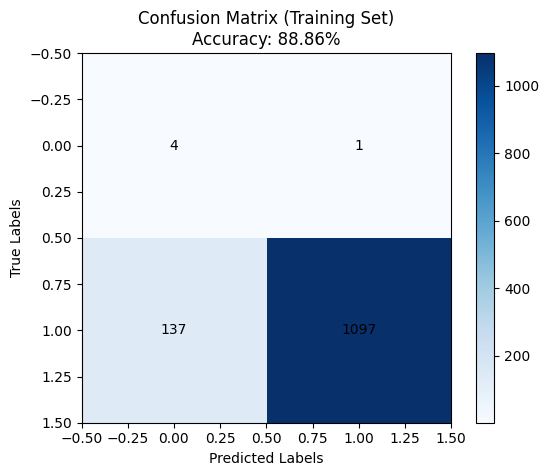

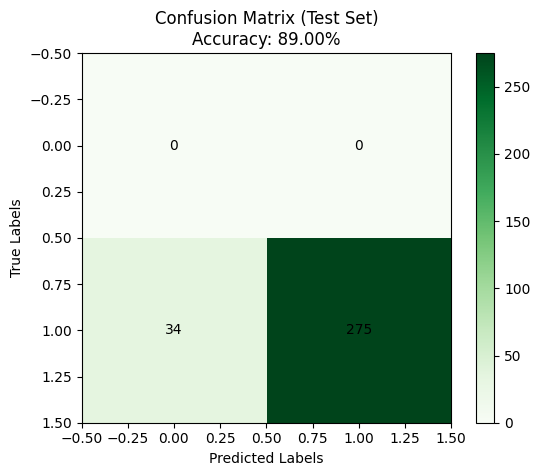

In [121]:
# Defining confusion matrix
def compute_confusion_matrix(true_labels, predicted_labels):
    TP = np.sum((true_labels == 1) & (predicted_labels == 1)) #true positive definition
    TN = np.sum((true_labels == 0) & (predicted_labels == 0)) #true negative definition
    FP = np.sum((true_labels == 0) & (predicted_labels == 1)) #false positive definition
    FN = np.sum((true_labels == 1) & (predicted_labels == 0)) #false positive definition
    return np.array([[TP, FP], [FN, TN]])

# Defining heatmap
def plot_confusion_matrix(conf_matrix, dataset_type, cmap, accuracy):
    plt.imshow(conf_matrix, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")
    plt.title(f"Confusion Matrix ({dataset_type})\nAccuracy: {accuracy:.2f}%")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Training Set Performance
true_labels_train = y_train  # actual labels of the training set
predicted_labels_train = binary_prediction_function(X_train_expanded, optimal_weights_k_fold)  # training predictions
conf_matrix_train = compute_confusion_matrix(true_labels_train, predicted_labels_train)

# Calculating the accuracy of the training set
accuracy_train = (conf_matrix_train[0, 0] + conf_matrix_train[1, 1]) / np.sum(conf_matrix_train) * 100

# Test Set Performance
true_labels_test = y_test  # actual labels of the test set
predicted_labels_test = binary_prediction_function(X_test_expanded, optimal_weights_k_fold)  # test predictions
conf_matrix_test = compute_confusion_matrix(true_labels_test, predicted_labels_test)

# Calculating the accuracy of the test set
accuracy_test = (conf_matrix_test[0, 0] + conf_matrix_test[1, 1]) / np.sum(conf_matrix_test) * 100

# Plotting heatmaps
# Heatmap for training set
plot_confusion_matrix(conf_matrix_train, dataset_type="Training Set", cmap='Blues', accuracy=accuracy_train)

# Heatmap for test set
plot_confusion_matrix(conf_matrix_test, dataset_type="Test Set", cmap='Greens', accuracy=accuracy_test)


In [122]:
# Precision, Recall, F1-Score Function
def compute_classification_metrics(true_labels, predicted_labels):
    TP = np.sum((true_labels == 1) & (predicted_labels == 1))
    FP = np.sum((true_labels == 0) & (predicted_labels == 1))
    FN = np.sum((true_labels == 1) & (predicted_labels == 0))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0 #calculating how many of the positive predictions are actually true
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0  #measuring how many true positives are true
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0 #the harmonic mean of Precision and Recall

    return {"precision": precision, "recall": recall, "f1_score": f1_score}

# For training set
metrics_train = compute_classification_metrics(true_labels_train, predicted_labels_train)
print(f"Training Set Metrics: {metrics_train}")

# For test set
metrics_test = compute_classification_metrics(true_labels_test, predicted_labels_test)
print(f"Test Set Metrics: {metrics_test}")


Training Set Metrics: {'precision': 0.8, 'recall': 0.028368794326241134, 'f1_score': 0.0547945205479452}
Test Set Metrics: {'precision': 0, 'recall': 0.0, 'f1_score': 0}


In [123]:
def binary_prediction_function_threshold(data_matrix, weights,threshold):
    # the binary classification can be obtained by applying the logistic function to the predicted ys i.e., Xw
    probability = logistic_function(model_function(data_matrix, weights))
    return probability > threshold

In [124]:
data_matrix = linear_regression_data(X_test_standardized)  # Standardize edilmiş test verisi
labels = y_test  # Test setindeki gerçek etiketler

threshold = 0.0  # Starting threshold value
delta_t = 0.05   # Increment for threshold

# Threshold değerlerine göre TPR ve FPR hesaplama
values = []  # Initialize values list to store results

# Threshold değerlerine göre TPR ve FPR hesaplama
while threshold <= 1:
    predicted_labels = binary_prediction_function_threshold(data_matrix, optimal_weights_k_fold, threshold)
    tn, fp, fn, tp = compute_confusion_matrix(labels.ravel(), predicted_labels.ravel()).ravel()

    # Bölme hatasını engellemek için kontrol
    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate

    values.append([FPR, TPR, threshold])
    threshold += delta_t

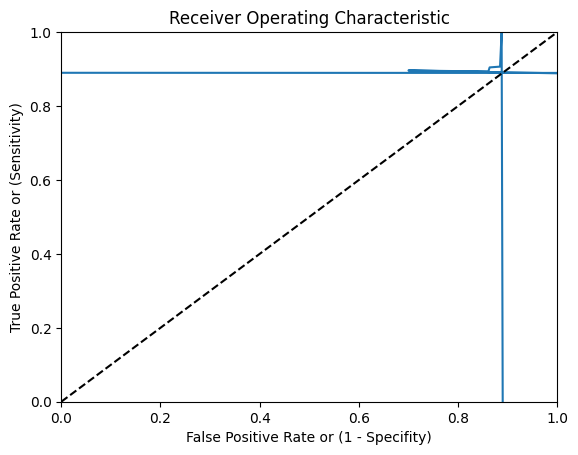

In [125]:
x_val=[]
y_val=[]
for i in values:
    x_val.append(i[0])
    y_val.append(i[1])

plt.plot(x_val,y_val)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.show()